### Tarea 10.7

Resuelva el siguiente problema de valor inicial usando el método de Runge-Kutta de orden 4 y el método de Taylor de orden 4.

$$
y'(t) = 1 + (t - y)^2\,,\quad 2 \leq t \leq 3\,,\quad y(2) = 1\,,
$$

que tiene solución exacta $y(t) = t + 1/(1-t)$. Compare los errores y el número de evaluaciones necesarias. ¿Cuál es preferible y por qué?


### La formula de Runge-Kutta de cuato orden es:

$$w_{i+1}=w_{i}+\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})*h$$

### La formula de Taylor de cuarto orden es:
$$w_{i+1} = w_i + hf(t_i, w_i) + \frac{h^2}{2}\frac{d f}{d t}(t_i, w_i) +\frac{h^{3}}{6}\frac{d^{2}f}{dt^{2}}(t_i, w_i)+\frac{h^4}{24}\frac{d^{3}  f}{d t^{3}}(t_i, w_i)$$

Hay una parte de su pregunta que no entiendo, nos pide Compare el número de evaluaciones necesarias, pero ¿para qué exactamente, o respecto a que?, como veremos en mi respuesta, tenemos que tener un mayor número de evaluaciones en la serie de Taylor para poder "igualar" a Runge-Kutta, pero jamás van a ser iguales, por lo que no sé que criterio usar para comparar.

Lo que si puedo mencionar es que sin importar el número de evaluaciones el error se mantiene, si no me cree cambie el N=10 por N=100 en la "comparación de errores", y vea como el error se mantiene constante.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, a, b, yo, N):
  """Esta función fue tomada de la clase número 20, y lo que hace es entregarnos dos array, el primero "ts" son valores
     independientes pertenecientes al eje de las abscisas separados unos de otros por una distancia "h", estos valores
     son evaluados en la solución de la EDO, y puestos en "sol" el array con los resultados."""

    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        k1 = h*f(t, w)
        k2 = h*f(t+h/2, w+k1/2)
        k3 = h*f(t+h/2, w+k2/2)
        k4 = h*f(t + h, w + k3)
        w = w + (k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

In [2]:
def taylor4(f, df, d2f, d3f, a, b, yo, N):
  """Esta función fue tomada de la clase número 19, y lo que hace es entregarnos dos array, el primero "ts" son valores
     independientes pertenecientes al eje de las abscisas separados unos de otros por una distancia "h", estos valores
     son evaluados en la solución de la EDO, y puestos en "sol" el array con los resultados."""

    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)

    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*(f(t, w) + h*(df(t, w)/2 + h*(d2f(t, w)/6 + h*d3f(t, w)/24)))
        t = t + h

    ts[N] = t
    sol[N] = w

    return ts, sol

Las definiciones de las funciones son iguales porque bueno, hacen lo mismo pero de distintas formas

In [4]:
#No creo que haga falta poner cadena de documentación, o docstring, en estas funciones son solo derivadas
def f(t, y):
    return 1+(t-y)**2

def df(t, y):
    return (2*t-2*y)

def d2f(t, y):
    return (2)

def d3f(t, y):
    return (0)

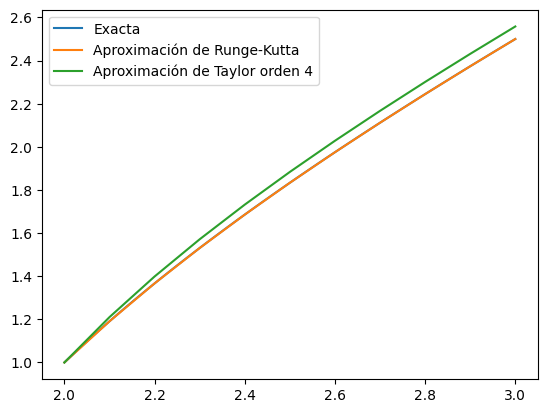

In [18]:
#Por aquí tenemos las gráficas de los resultados de la solución de la ecuación diferencial, evaluada en cierto intervalo de valores t entre 2 y 3
t = np.linspace(2, 3, 100)
plt.plot(t,t+1/(1-t), label='Exacta')
plt.plot(*rk4(f, 2, 3, 1, 10), label='Aproximación de Runge-Kutta ')
plt.plot(*taylor4(f, df, d2f, d3f, 2, 3, 1, 10), label='Aproximación de Taylor orden 4')
plt.legend()

###Comparación de errores

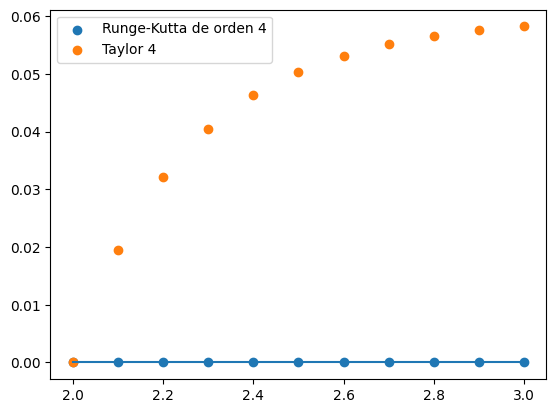

In [22]:
N = 10
t, sol_rk4 = rk4(f, 2, 3, 1, N)
t, sol_t4 = taylor4(f, df, d2f, d3f, 2, 3, 1, N)
exacta = t+1/(1-t)
plt.scatter(t, np.abs(exacta - sol_rk4), label='Runge-Kutta de orden 4')
plt.scatter(t, np.abs(exacta - sol_t4), label='Taylor 4')
plt.plot(t, np.full(len(t), 0))
plt.legend()

##¿Cuál es preferible y por qué?

En este caso como podemos notar por la diferencia significativa de errores, que nos conviene usar el método numérico de Runge-Kutta de orden 4, en vez del método de Taylor de orden 4, esto lo podemos explicar por qué, el método de Runge-Kutta de orden 4 es menos sensible a la elección de parámetros, como el tamaño del paso (h), en comparación con métodos de orden inferior. Aunque es importante elegir parámetros adecuados, el método de Runge-Kutta de orden 4 puede proporcionar soluciones razonablemente precisas en un rango más amplio de valores de h. Lo cual podemos notar claramente en este caso dado que, entre más aumentemos N, lo que disminuye h, más preciso se vuelve el método de Taylor de orden 4, mientras que el método de Runge-Kutta de orden 4 le basta tener un h "amplio" para ya tener una muy buena precisión.

En resumen, aunque ambos métodos son capaces de resolver el problema, el método de Runge-Kutta de orden 4 demuestra ser más preciso en esta situación particular. La preferencia por este método podría deberse a su estabilidad, menor sensibilidad a los parámetros y capacidad para manejar eficientemente ecuaciones diferenciales de segundo orden.

# Calificación: 6.0

Hay un error en la derivada: Faltó tomar la derivada de $y$ respecto a $t$. Se tomó una derivada parcial respecto a $t$, se debe tomar una derivada total.

Esto afecta el resultado y el análisis.